In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
news_df = pd.read_csv('data/news_classification.csv')
xFeat = news_df.drop('high_popularity', axis=1)
y = news_df['high_popularity']
xTrain, xTest, yTrain, yTest = train_test_split(xFeat, y, test_size=0.3, random_state=42)

In [7]:
# Baseline classification accuracies
models = [
    LogisticRegression(),
    SGDClassifier(),
    RidgeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
]

accuracies = []
for model in models:
    model.fit(xTrain, yTrain)
    y_pred = model.predict(xTest)
    accuracy = accuracy_score(yTest, y_pred)
    accuracies.append((model.__class__.__name__, accuracy))

for model_name, accuracy in accuracies:
    print(f"{model_name}: {accuracy}")

/Users/zachcheng/opt/anaconda3/envs/CS334/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.657677333586554
SGDClassifier: 0.5714557022125154
RidgeClassifier: 0.6957553888519609
KNeighborsClassifier: 0.6367866299496724
SVC: 0.6625201785205583
DecisionTreeClassifier: 0.6111480391225904
RandomForestClassifier: 0.6964200930585889
GradientBoostingClassifier: 0.7120881207862502
AdaBoostClassifier: 0.7040167125629095
GaussianNB: 0.6662235305289146


Best Model Accuracy: 0.6528501765596099
Best Model AUC: 0.7101897541333251


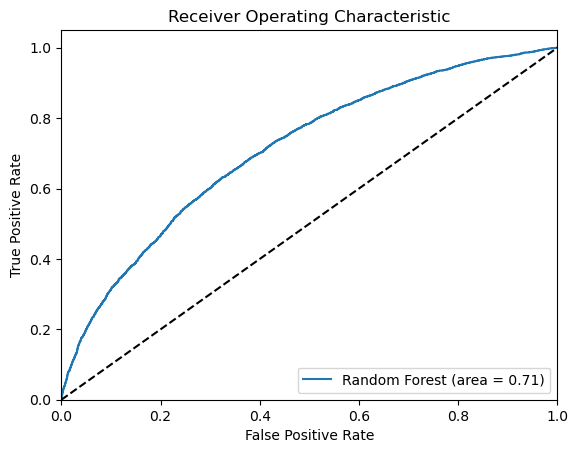

In [77]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Setup k-Fold Cross-Validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForest Classifier
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(xTrain, yTrain)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(xTest)

# Evaluate the best model
accuracy = accuracy_score(yTest, y_pred)
auc_score = roc_auc_score(yTest, best_model.predict_proba(xTest)[:, 1])

# Print results
print(f"Best Model Accuracy: {accuracy}")
print(f"Best Model AUC: {auc_score}")

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(yTest, best_model.predict_proba(xTest)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
